In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def setup_files(path):

    files = [os.path.join(path, i) for i in os.listdir(path)]
    folders = ['CV', 'lith', 'delith', 'EIS']
    cycles = ['C1', 'C2', 'C3', 'C4', 'C5']

    for i in folders:
        if not os.path.exists(os.path.join(path, i)):
            os.mkdir(os.path.join(path, i))

    if not os.path.exists(os.path.join(path, 'EIS', 'Relaxis')):
        os.mkdir(os.path.join(path, 'EIS', 'Relaxis'))
        
    for i in cycles:
        if not os.path.exists(os.path.join(path, 'EIS', 'Relaxis', i)):
            os.mkdir(os.path.join(path, 'EIS', 'Relaxis', i))
        if not os.path.exists(os.path.join(path, 'lith', i)):
            os.mkdir(os.path.join(path, 'lith', i))
        if not os.path.exists(os.path.join(path, 'delith', i)):
            os.mkdir(os.path.join(path, 'delith', i))
        
    for i in os.listdir(path):
        if 'EIS_' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'EIS', i))
    for i in os.listdir(os.path.join(path, 'EIS')):
        if 'relaxis' in i:
            os.rename(os.path.join(path, 'EIS', i), os.path.join(path, 'EIS', 'Relaxis', i))


    for i in os.listdir(os.path.join(path, 'EIS', 'Relaxis')):  
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C3', i))
        elif i[-6:-5] == '3':
                os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C5', i))
        elif i[-5:] == 's.txt':
            os.rename(os.path.join(path, 'EIS', 'Relaxis', i), os.path.join(path, 'EIS', 'Relaxis', 'C1', i))
    
    for i in os.listdir(path):
        if '_lith_' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'lith', i))
        elif '_delith' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'delith', i))
        elif i != 'README.txt' and len(i) > 7:
            os.rename(os.path.join(path, i), os.path.join(path, 'CV', i))
       
    for i in os.listdir(os.path.join(path, 'lith')):
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C3', i))
        elif i[-6:-5] == '3':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C5', i))
        elif len(i) > 3:
            os.rename(os.path.join(path, 'lith', i), os.path.join(path, 'lith', 'C1', i))
    
    for i in os.listdir(os.path.join(path, 'delith')):
        if i[-6:-5] == '1':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C2', i))
        elif i[-6:-5] == '2':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C3', i))
        elif i[-6:-5] == '3':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C4', i))
        elif i[-6:-5] == '4':
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C5', i))
        elif len(i) > 3:
            os.rename(os.path.join(path, 'delith', i), os.path.join(path, 'delith', 'C1', i))

def cc(path, area, thickness):

    cv_path = os.path.join(path, 'CV')
    lith_path = os.path.join(path, 'lith')
    delith_path = os.path.join(path, 'delith')
    cv_df = pd.DataFrame()
    for i in os.listdir(cv_path):
        f = os.path.join(cv_path, i)
        df = pd.read_csv(f, sep = ';')
        if '_Initial_' in i:
            df['CV'] = 'Initial'
        else:
            df['CV'] = 'Final'
        cv_df = pd.concat([cv_df, df], ignore_index=True)
        
    lith_path = os.path.join(path, 'lith')
    delith_path = os.path.join(path, 'delith')

    cycles = ['C1', 'C2', 'C3', 'C4', 'C5']

    lithiation = pd.DataFrame()
    delithiation = pd.DataFrame()
    capacity_l = pd.DataFrame(columns = ['Capacity', 'Cycle', 'L/D'])
    capacity_d = pd.DataFrame(columns = ['Capacity', 'Cycle', 'L/D'])
    efficiency = pd.DataFrame()
    n = 1
    for i in cycles:
        l = os.path.join(lith_path, i)
        for j in os.listdir(l):
            f = os.path.join(lith_path, i, j)
            df = pd.read_csv(f, sep = ';')
            df['Set'] = i[-1]
            df['Cycle'] =  n #str(n) ### string or int
            df['Capacity_calc'] = -df['WE(1).Charge (C)'] /3.6 / (area * 1e-7 * thickness)
            lithiation = pd.concat([lithiation, df], ignore_index=True)
            capacity_l.loc[n] = (max(df['Capacity_calc']), n, 'Lithiation')
            
            n += 1

    n = 1
    for i in cycles:
        d = os.path.join(delith_path, i)
        for j in os.listdir(d):
            f = os.path.join(delith_path, i, j)
            df = pd.read_csv(f, sep = ';')
            df['Set'] = i[-1]
            df['Cycle'] =  n
            df['Capacity_calc'] = df['WE(1).Charge (C)'] /3.6 / (area * 1e-7 * thickness)
            delithiation = pd.concat([delithiation, df], ignore_index=True)
            capacity_d.loc[n] = (max(df['Capacity_calc']), n, 'Delithiation')
            n += 1
    capacity = pd.concat([capacity_l, capacity_d], ignore_index=True)
    efficiency['Efficiency'] = capacity_l['Capacity'] / capacity_d['Capacity'] * 100
    efficiency['Cycle'] = pd.Series(np.arange(0,26,1))

    
    return cv_df, lithiation, delithiation, capacity, efficiency

def eis(path, potentials):
    
    # names = ['Potential vs Li/Li$^+$']
    col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
    
    files = [os.path.join(path, i) for i in os.listdir(path)]
    eis_data = pd.DataFrame()
    spectra = pd.DataFrame()

    n = 1 #Run
    k = 1 #Run for spectra
    for i in files:
        m = 0 #potential
       
        for j in os.listdir(i):
            
            if 'Fit' in j:
                fit_path = os.path.join(i, j)
                df = pd.read_csv(fit_path, sep = '\t', skiprows = 2)
                df = df.rename(columns={'FreeVariable' : 'Potential vs Li/Li$^+$', 
                                        'Resistance 1: value' : 'Electrolyte Resistance ($\Omega$)', 
                                        'Resistance 2: value' : 'Charge transfer Resistance ($\Omega$)' })
                df['Run'] = n
                eis_data = pd.concat([eis_data, df])
                n += 1
                
            if 'Spectra' in j:
                spectra_path = os.path.join(i, j)
                df_s = pd.read_csv(spectra_path, skiprows=4, sep = '\t', names=col)

                df_s[col[2]] = -df_s[col[2]]
                df_s[col[5]] = -df_s[col[5]]
                df_s['Potential vs Li/Li$^+$'] = potentials[m]
                df_s['Run'] = k
                spectra = pd.concat([spectra, df_s])
                m += 1
        k += 1
    return eis_data, spectra


In [ ]:
# # =============================== LESK32 set1 ==============================================================================================
# sample = 'LESK32 800C 20 min'
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\1st'
# setup_files(path)
# cv, l, d, c, e = cc(path, 0.785, 80)
# results = [cv, l, d, c, e]
# for i in results:
#     i['Sample'] = sample
# palette = 'cividis_r'
# # sns.set_palette()
# fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
# sns.lineplot(data = l, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
# sns.lineplot(data = d, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
# sns.scatterplot(data = c, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
# sns.scatterplot(data = e, x = 'Cycle', y = 'Efficiency', ax = ax[2])
# sns.scatterplot(data = cv, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

# plt.suptitle(sample)
# # ax[1].set_ylim(300, 600)
# # ax[2].set_ylim(70, 100)

# # EIS

# p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\1st\EIS\Relaxis'
# pot = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]

# eis_data, spectra = eis(p, pot)
# eis_data['Sample'] = sample
# spectra['Sample'] = sample
# filter = eis_data[eis_data['Potential vs Li/Li$^+$'] == 4.]
# filter_s = spectra[spectra['Potential vs Li/Li$^+$'] == '4.0']

# # ================= Plot ===========================

# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

# sns.barplot(data = eis_data, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
# sns.barplot(data = eis_data, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
# sns.scatterplot(data = spectra, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
# sns.scatterplot(data = filter_s, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
# sns.lineplot(data = filter_s, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# # ============== Plot Settings =====================

# # ax[0,0].legend_.remove()
# ax[0,1].legend_.remove()
# ax[1,0].legend_.remove()
# ax[1,0].set_xlim(100,600)
# ax[1,0].set_ylim(-10,300)
# ax[1,1].set_title('4.0 V')
# plt.suptitle(sample)

In [ ]:
# # =============================== LESK32 set2 ==============================================================================================
# sample = 'LESK32 700°C 1h'
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\2nd'
# setup_files(path)
# cv_2, l_2, d_2, c_2, e_2 = cc(path, 0.785, 80)
# results_2 = [cv_2, l_2, d_2, c_2, e_2]
# for i in results_2:
#     i['Sample'] = sample
# palette = 'cividis_r'
# # sns.set_palette()
# fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
# sns.lineplot(data = l_2, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
# sns.lineplot(data = d_2, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
# sns.scatterplot(data = c_2, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
# sns.scatterplot(data = e_2, x = 'Cycle', y = 'Efficiency', ax = ax[2])
# sns.scatterplot(data = cv_2, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

# plt.suptitle(sample)


# ################ EIS ######################

# p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\2nd\EIS\Relaxis'
# pot = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]

# eis_data2, spectra2 = eis(p, pot)
# eis_data2['Sample'] = sample
# spectra2['Sample'] = sample
# filter2 = eis_data2[eis_data2['Potential vs Li/Li$^+$'] == 4.]
# filter_s2 = spectra2[spectra2['Potential vs Li/Li$^+$'] == '4.0']

# # ================= Plot ===========================

# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

# sns.barplot(data = eis_data2, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
# sns.barplot(data = eis_data2, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
# sns.scatterplot(data = spectra2, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
# sns.scatterplot(data = filter_s2, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
# sns.lineplot(data = filter_s2, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# # ============== Plot Settings =====================

# # ax[0,0].legend_.remove()
# ax[0,1].legend_.remove()
# ax[1,0].legend_.remove()
# ax[1,0].set_xlim(100,600)
# ax[1,0].set_ylim(-10,300)
# ax[1,1].set_title('4.0 V')
# plt.suptitle(sample)

In [ ]:
# ################## 5 min annealed 800 C ###################

# sample = 'LESK32 800°C 5 min'
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\5min annealed'
# setup_files(path)
# cv_3, l_3, d_3, c_3, e_3 = cc(path, 0.785, 80)
# results_3 = [cv_3, l_3, d_3, c_3, e_3]
# for i in results_3:
#     i['Sample'] = sample
# palette = 'cividis_r'
# # sns.set_palette()
# # fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
# # sns.lineplot(data = l_3, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
# # sns.lineplot(data = d_3, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
# # sns.scatterplot(data = c_3, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
# # sns.scatterplot(data = e_3, x = 'Cycle', y = 'Efficiency', ax = ax[2])
# # sns.scatterplot(data = cv_3, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

# # plt.suptitle(sample)

# # ############# EIS #############

# # p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Set2\NA_01\EIS\Relaxis'
# p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\5min annealed\EIS\Relaxis'
# pot = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]

# eis_data3, spectra3 = eis(p, pot)
# eis_data3['Sample'] = sample
# spectra3['Sample'] = sample
# filter3 = eis_data3[eis_data3['Potential vs Li/Li$^+$'] == 4.]
# filter_s3 = spectra3[spectra3['Potential vs Li/Li$^+$'] == '4.0']

# # ================= Plot ===========================

# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

# sns.barplot(data = eis_data3, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
# sns.barplot(data = eis_data3, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
# sns.scatterplot(data = spectra3, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
# sns.scatterplot(data = filter_s3, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
# sns.lineplot(data = filter_s3, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# # ============== Plot Settings =====================

# # ax[0,0].legend_.remove()
# ax[0,1].legend_.remove()
# ax[1,0].legend_.remove()
# ax[1,0].set_xlim(100,600)
# ax[1,0].set_ylim(-10,300)
# ax[1,1].set_title('4.0 V')
# plt.suptitle(sample)

# # filter_s

In [ ]:
# # =============- 750C 5 min ============================
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\750 5m'
# sample = 'LESK32 750C 5 min'
# setup_files(path)
# cv_4, l_4, d_4, c_4, e_4 = cc(path, 0.785, 80)
# results_4 = [cv_4, l_4, d_4, c_4, e_4]
# for i in results_4:
#     i['Sample'] = sample
# palette = 'cividis_r'
# # sns.set_palette()
# fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
# sns.lineplot(data = l_4, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
# sns.lineplot(data = d_4, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
# # sns.scatterplot(data = c_4, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
# # sns.scatterplot(data = e_4, x = 'Cycle', y = 'Efficiency', ax = ax[2])
# sns.scatterplot(data = cv_4, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

# plt.suptitle(sample)

# # EIS

# p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\750 5m\EIS\Relaxis'
# pot = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]

# eis_data_4, spectra_4 = eis(p, pot)
# eis_data_4['Sample'] = sample
# spectra_4['Sample'] = sample
# filter_4 = eis_data_4[eis_data_4['Potential vs Li/Li$^+$'] == 4.]
# filter_s_4 = spectra_4[spectra_4['Potential vs Li/Li$^+$'] == '4.0']

# # ================= Plot ===========================

# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

# sns.barplot(data = eis_data_4, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
# sns.barplot(data = eis_data_4, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
# sns.scatterplot(data = spectra_4, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
# sns.scatterplot(data = filter_s_4, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
# sns.lineplot(data = filter_s_4, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# # ============== Plot Settings =====================

# # ax[0,0].legend_.remove()
# ax[0,1].legend_.remove()
# ax[1,0].legend_.remove()
# ax[1,0].set_xlim(100,600)
# ax[1,0].set_ylim(-10,300)
# ax[1,1].set_title('4.0 V')
# plt.suptitle(sample)

In [ ]:
# # ================== Heated deposition 750C 2h and annealed 750 opt ======================
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\HDep 750 2h and annealing'
# sample = 'LESK32 HDep 750C + annealing opt'
# setup_files(path)
# cv_5, l_5, d_5, c_5, e_5 = cc(path, 0.785, 80)
# results_5 = [cv_5, l_5, d_5, c_5, e_5]
# for i in results_5:
#     i['Sample'] = sample
# palette = 'cividis_r'
# # sns.set_palette()
# fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
# sns.lineplot(data = l_5, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
# sns.lineplot(data = d_5, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
# sns.scatterplot(data = c_5, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
# sns.scatterplot(data = e_5, x = 'Cycle', y = 'Efficiency', ax = ax[2])
# sns.scatterplot(data = cv_5, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

# plt.suptitle(sample)

# # EIS

# # p = r''
# # pot = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]

# # eis_data_4, spectra_4 = eis(p, pot)
# # eis_data_4['Sample'] = sample
# # spectra_4['Sample'] = sample
# # filter_4 = eis_data_4[eis_data_4['Potential vs Li/Li$^+$'] == 4.]
# # filter_s_4 = spectra_4[spectra_4['Potential vs Li/Li$^+$'] == '4.0']

# # # ================= Plot ===========================

# # fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

# # sns.barplot(data = eis_data_4, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
# # sns.barplot(data = eis_data_4, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
# # sns.scatterplot(data = spectra_4, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
# # sns.scatterplot(data = filter_s_4, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
# # sns.lineplot(data = filter_s_4, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# # # ============== Plot Settings =====================

# # # ax[0,0].legend_.remove()
# # ax[0,1].legend_.remove()
# # ax[1,0].legend_.remove()
# # ax[1,0].set_xlim(100,600)
# # ax[1,0].set_ylim(-10,300)
# # ax[1,1].set_title('4.0 V')
# # plt.suptitle(sample)

Text(0.5, 0.98, 'LESK32 PLSA Pt')

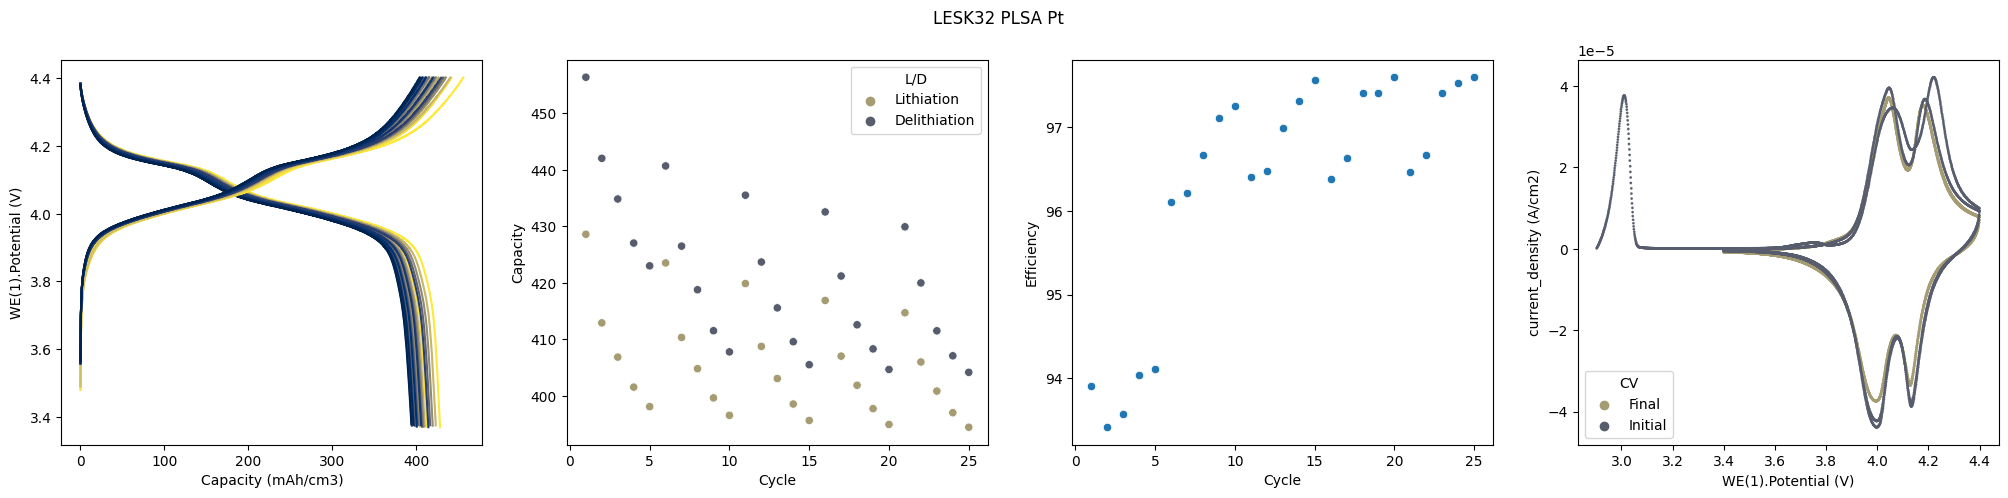

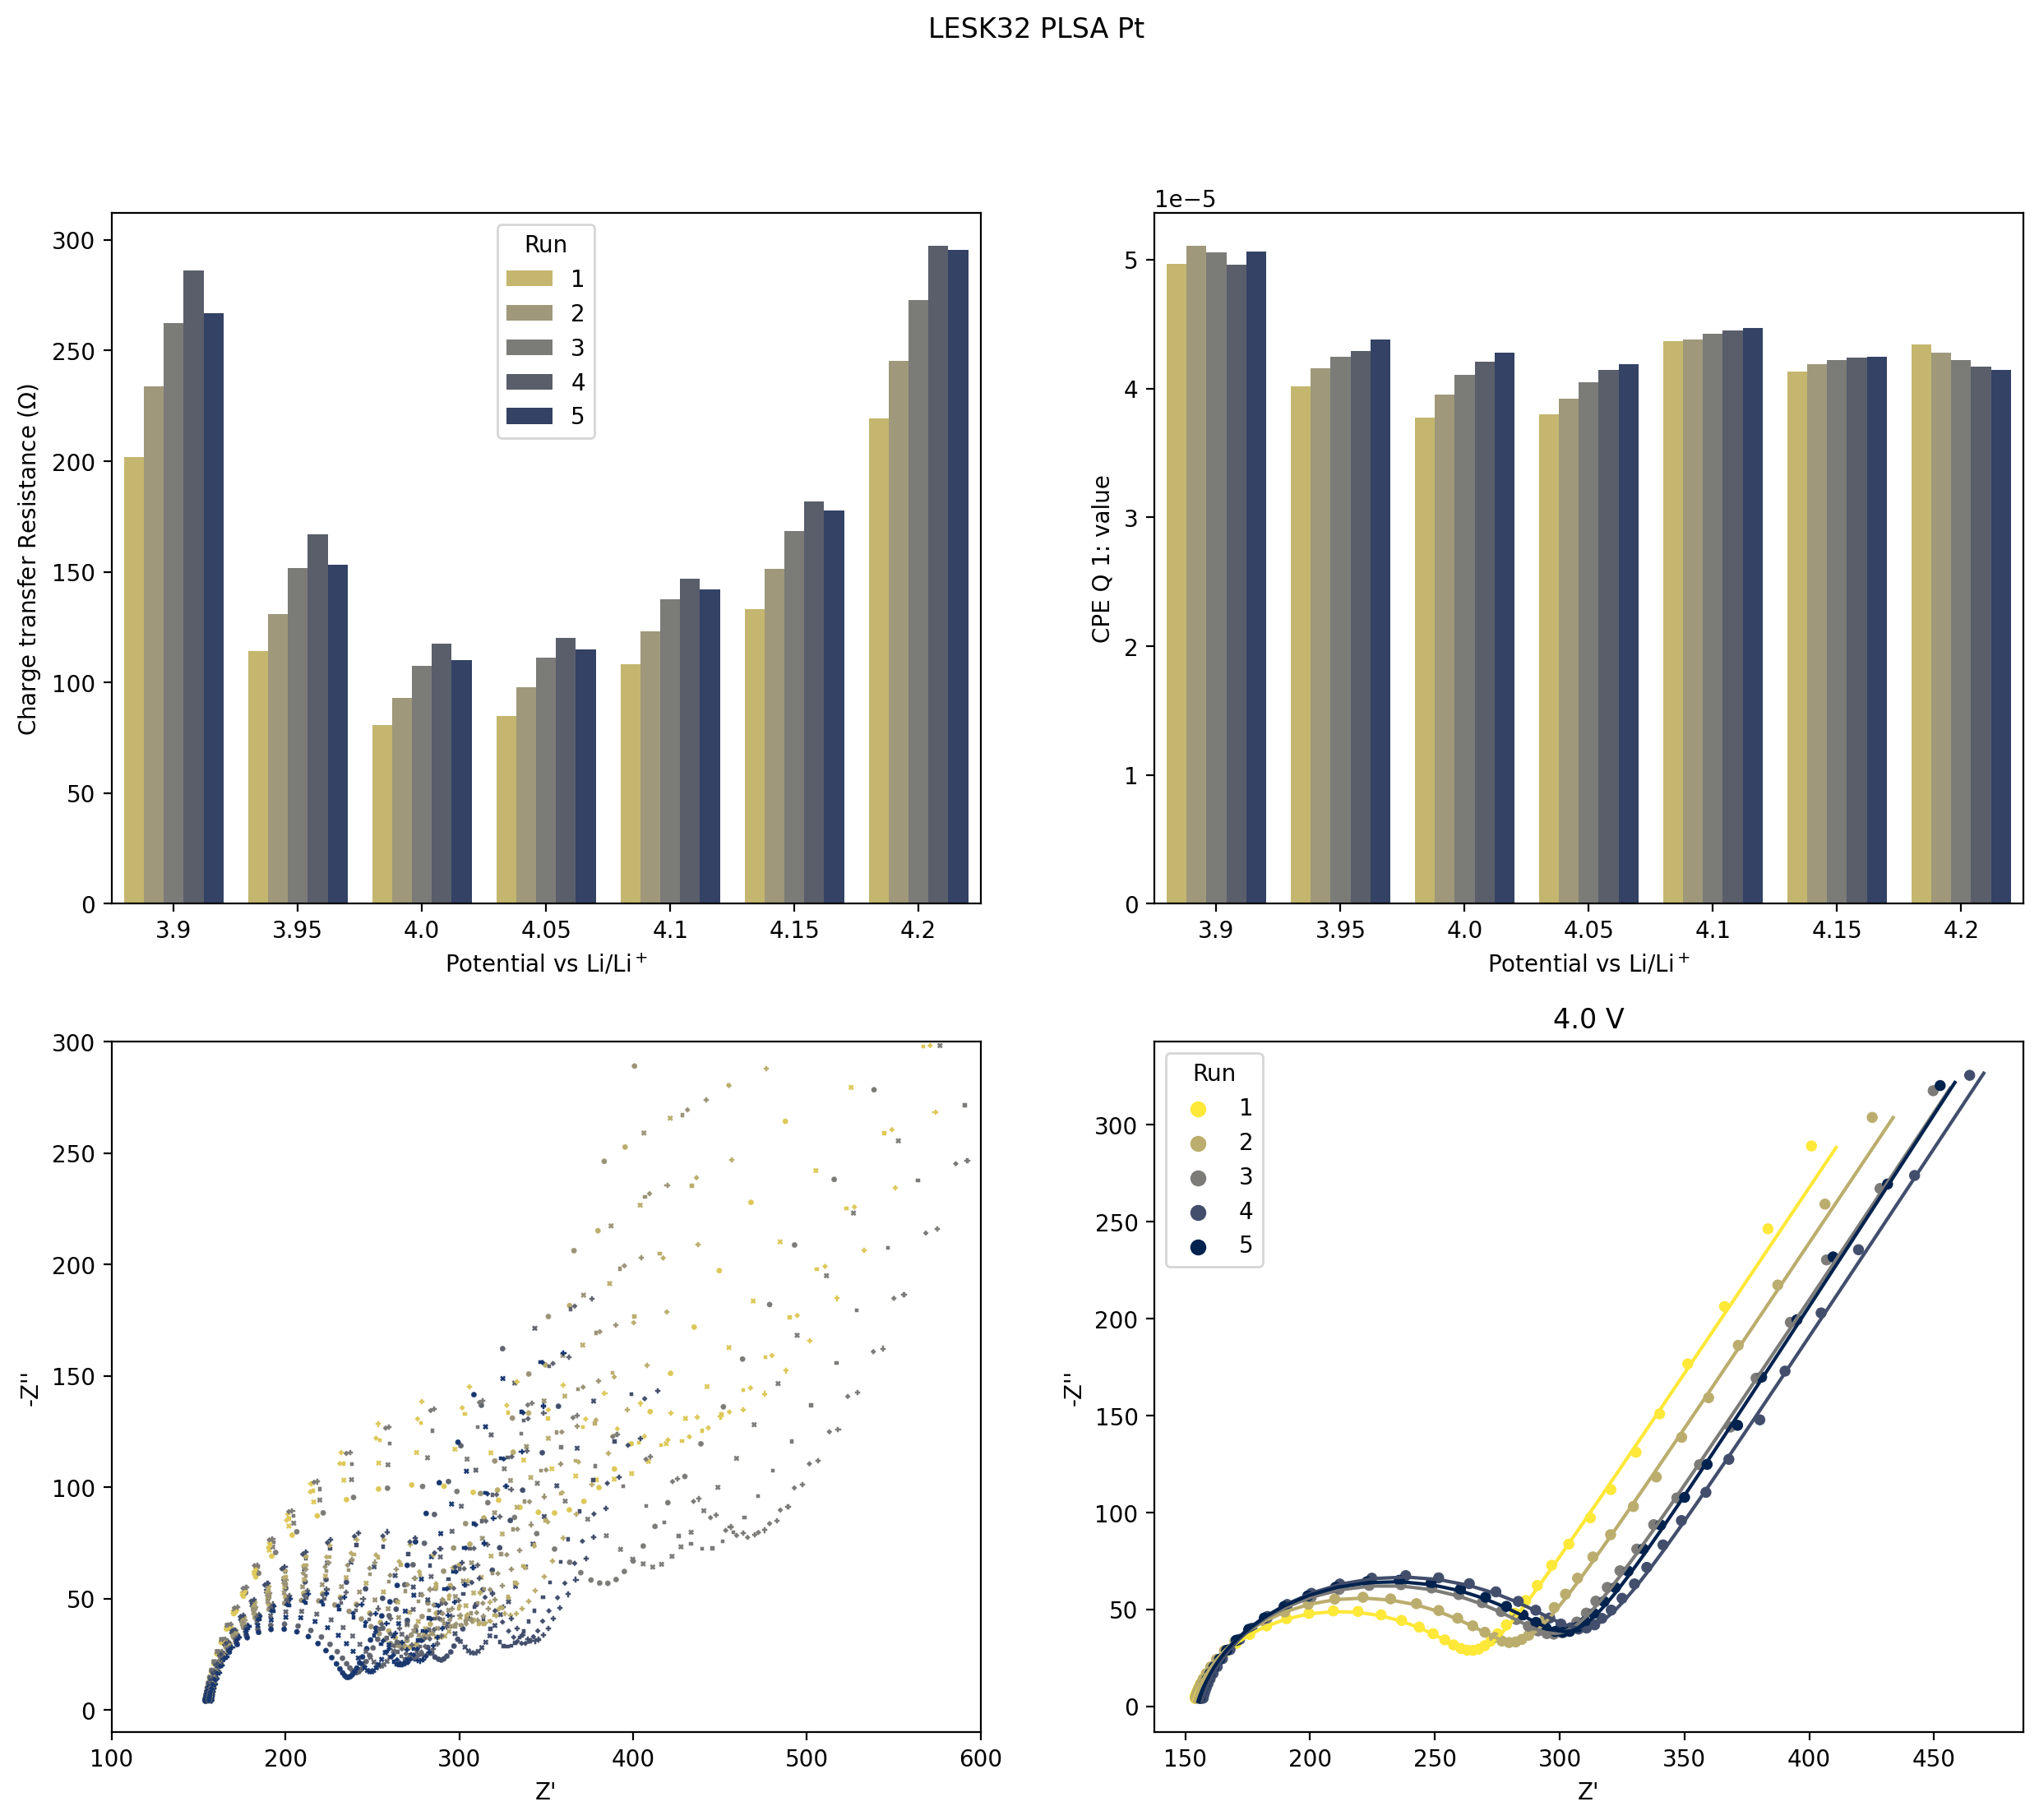

In [8]:
# ================== PLSA Pt ======================
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\PLSA Pt\01'
sample = 'LESK32 PLSA Pt'
setup_files(path)
cv_6, l_6, d_6, c_6, e_6 = cc(path, 0.785, 80)
results_6 = [cv_6, l_6, d_6, c_6, e_6]
for i in results_6:
    i['Sample'] = sample
palette = 'cividis_r'
# sns.set_palette()
fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
sns.lineplot(data = l_6, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
sns.lineplot(data = d_6, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
sns.scatterplot(data = c_6, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
sns.scatterplot(data = e_6, x = 'Cycle', y = 'Efficiency', ax = ax[2])
sns.scatterplot(data = cv_6, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

plt.suptitle(sample)

# EIS

p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\PLSA Pt\01\EIS\Relaxis'
pot = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]

eis_data_6, spectra_6 = eis(p, pot)
eis_data_6['Sample'] = sample
spectra_6['Sample'] = sample
filter_6 = eis_data_6[eis_data_6['Potential vs Li/Li$^+$'] == 4.]
filter_s_6 = spectra_6[spectra_6['Potential vs Li/Li$^+$'] == '4.0']

# ================= Plot ===========================

fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

sns.barplot(data = eis_data_6, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
sns.barplot(data = eis_data_6, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
sns.scatterplot(data = spectra_6, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
sns.scatterplot(data = filter_s_6, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
sns.lineplot(data = filter_s_6, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# ============== Plot Settings =====================

# ax[0,0].legend_.remove()
ax[0,1].legend_.remove()
ax[1,0].legend_.remove()
ax[1,0].set_xlim(100,600)
ax[1,0].set_ylim(-10,300)
ax[1,1].set_title('4.0 V')
plt.suptitle(sample)

Text(0.5, 0.98, 'Previous target')

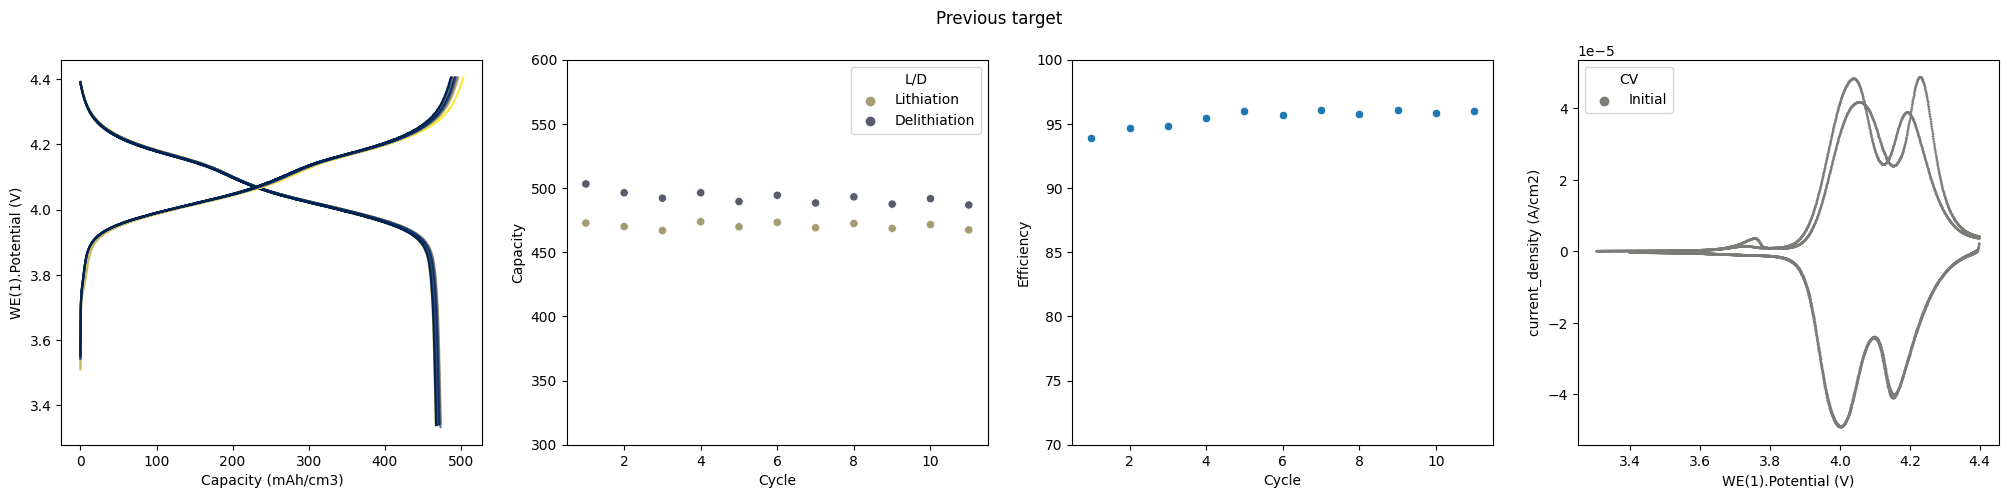

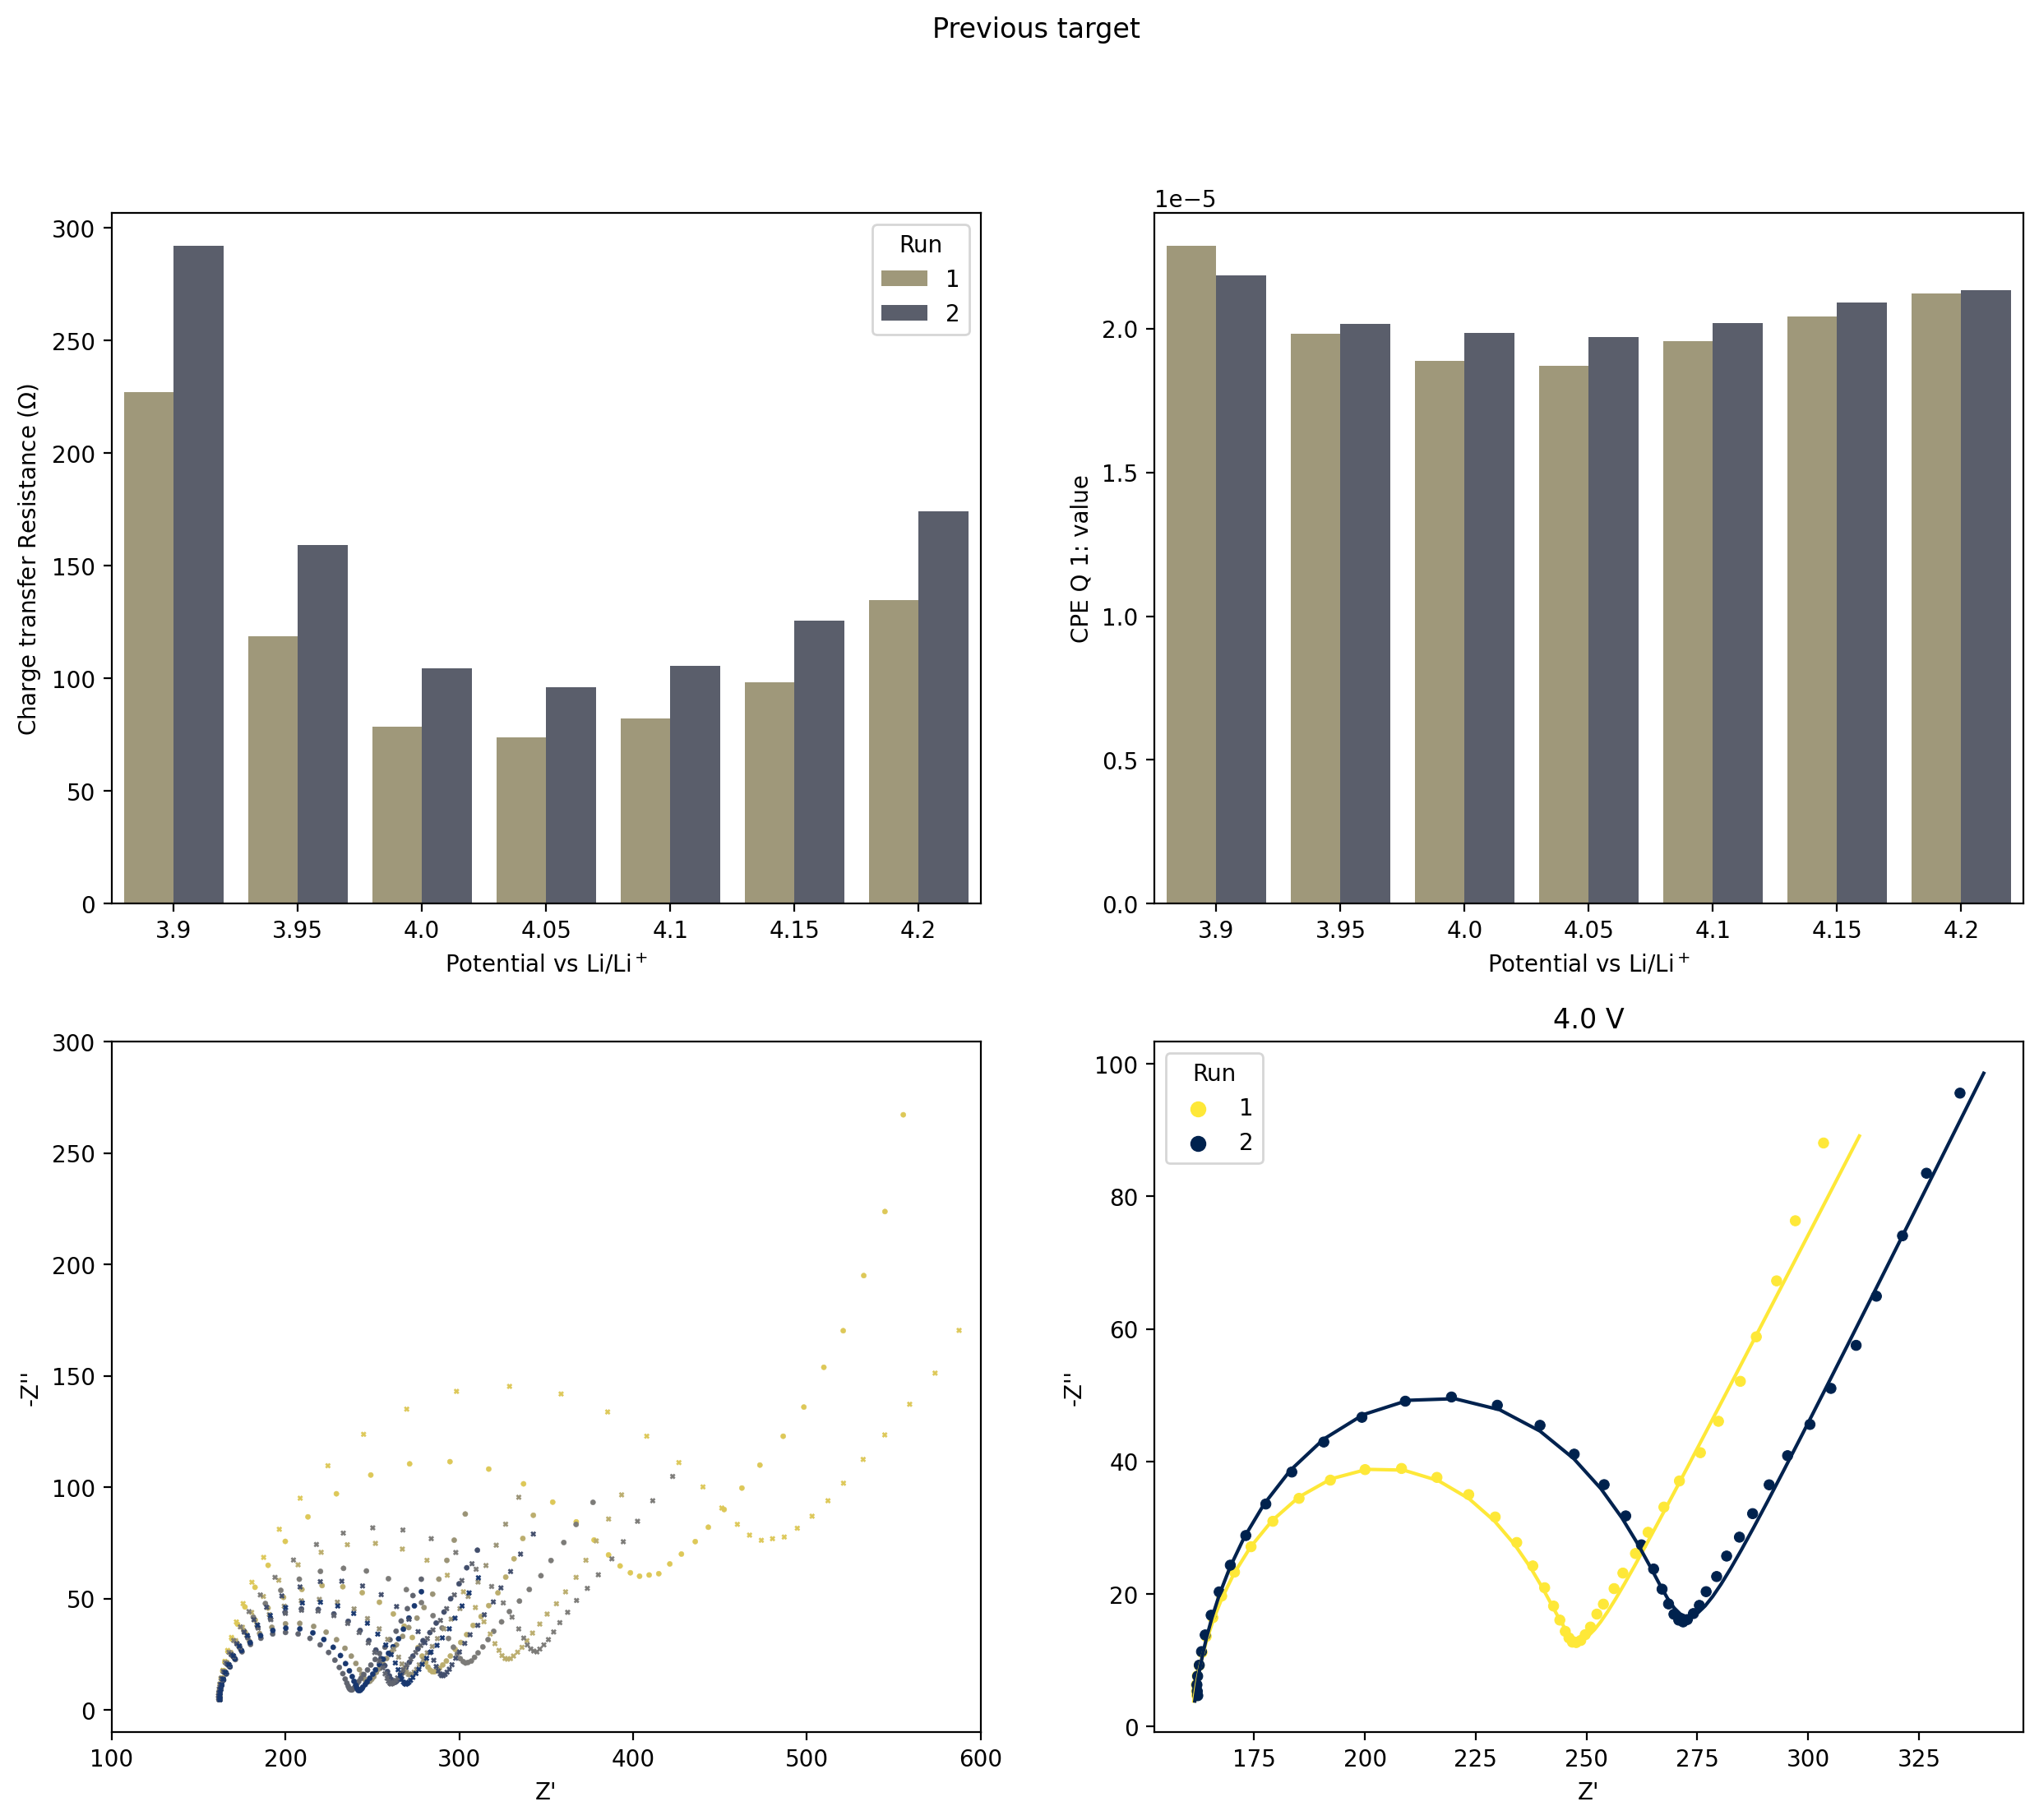

In [6]:
# =============================== Prev target A Pt ==============================================================================================
sample = 'Previous target'
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\Prev target APt ref'
setup_files(path)
cv_0, l_0, d_0, c_0, e_0 = cc(path, 0.785, 80)
results_0 = [cv_0, l_0, d_0, c_0, e_0]
for i in results_0:
    i['Sample'] = sample
palette = 'cividis_r'
# sns.set_palette()
fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
sns.lineplot(data = l_0, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
sns.lineplot(data = d_0, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
sns.scatterplot(data = c_0, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
sns.scatterplot(data = e_0, x = 'Cycle', y = 'Efficiency', ax = ax[2])
sns.scatterplot(data = cv_0, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

plt.suptitle(sample)
##
ax[1].set_ylim(300, 600)
ax[2].set_ylim(70, 100)

# EIS

p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\Prev target APt ref\EIS\Relaxis'
pot = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]

eis_data0, spectra0 = eis(p, pot)
eis_data0['Sample'] = sample
spectra0['Sample'] = sample
filter0 = eis_data0[eis_data0['Potential vs Li/Li$^+$'] == 4.]
filter_s0 = spectra0[spectra0['Potential vs Li/Li$^+$'] == '4.0']

# ================= Plot ===========================

fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

sns.barplot(data = eis_data0, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
sns.barplot(data = eis_data0, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
sns.scatterplot(data = spectra0, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
sns.scatterplot(data = filter_s0, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
sns.lineplot(data = filter_s0, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# ============== Plot Settings =====================

# ax[0,0].legend_.remove()
ax[0,1].legend_.remove()
ax[1,0].legend_.remove()
ax[1,0].set_xlim(100,600)
ax[1,0].set_ylim(-10,300)
ax[1,1].set_title('4.0 V')
plt.suptitle(sample)

In [ ]:
# # ============Ref OF PREVIOUS TARGET =====================#
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Set2\A_01'
# sample = 'Prev target 800°C 20 min'
# # setup_files(path)
# cv_ref, l_ref, d_ref, c_ref, e_ref = cc(path, 0.785, 80)
# results_ref = [cv_ref, l_ref, d_ref, c_ref, e_ref]
# for i in results_ref:
#     i['Sample'] = sample
# palette = 'cividis_r'
# # sns.set_palette()
# fig, ax = plt.subplots(1,4, dpi = 100, figsize = (25,5))
# sns.lineplot(data = l_ref, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle',  legend = False, ax = ax[0], palette = palette)
# sns.lineplot(data = d_ref, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Cycle', legend = False, ax = ax[0], palette = palette)
# sns.scatterplot(data = c_ref, x = 'Cycle', y = 'Capacity', hue = 'L/D', ax = ax[1], palette=palette )
# sns.scatterplot(data = e_ref, x = 'Cycle', y = 'Efficiency', ax = ax[2])
# sns.scatterplot(data = cv_ref, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'CV', s = 3, edgecolor = None, palette=palette)

# plt.suptitle(sample)

# # EIS

# p = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\Preannealing\Set2\A_01\EIS\Relaxis'
# pot = [str(round(i, 2))  for i in np. arange(3.90, 4.20, 0.05)]

# eis_data_ref, spectra_ref = eis(p, pot)
# eis_data_ref['Sample'] = sample
# spectra_ref['Sample'] = sample
# filter_ref = eis_data_ref[eis_data_ref['Potential vs Li/Li$^+$'] == 4.]
# filter_s_ref = spectra_ref[spectra_ref['Potential vs Li/Li$^+$'] == '4.0']

# # ================= Plot ===========================

# fig, ax = plt.subplots(2,2, dpi = 200, figsize = (15,12))

# sns.barplot(data = eis_data_ref, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Run', palette = palette, ax = ax[0,0]) #Charge Trasfer Resistance
# sns.barplot(data = eis_data_ref, x = 'Potential vs Li/Li$^+$', y = 'CPE Q 1: value', hue = 'Run', palette = palette, ax = ax[0,1]) # CPE Q 1
# sns.scatterplot(data = spectra_ref, x = "Z'", y = "-Z''", hue = 'Potential vs Li/Li$^+$', style = 'Run', edgecolor = None, s = 5, palette = palette, ax = ax[1,0] ) # Spectra
# sns.scatterplot(data = filter_s_ref, x = "Z'", y = "-Z''", hue = 'Run', edgecolor = None, s = 20, palette = palette, ax = ax[1,1]) # Spectra 4.0 V
# sns.lineplot(data = filter_s_ref, x = "Fit Z'", y = "Fit -Z''", hue = 'Run', palette = palette, legend = False, ax = ax[1,1]) # Fit Spectra 4.0 V

# # ============== Plot Settings =====================

# # ax[0,0].legend_.remove()
# ax[0,1].legend_.remove()
# ax[1,0].legend_.remove()
# ax[1,0].set_xlim(100,600)
# ax[1,0].set_ylim(-10,300)
# ax[1,1].set_title('4.0 V')
# plt.suptitle(sample)

<AxesSubplot: xlabel='Potential vs Li/Li$^+$', ylabel='CPE Q 1: value'>

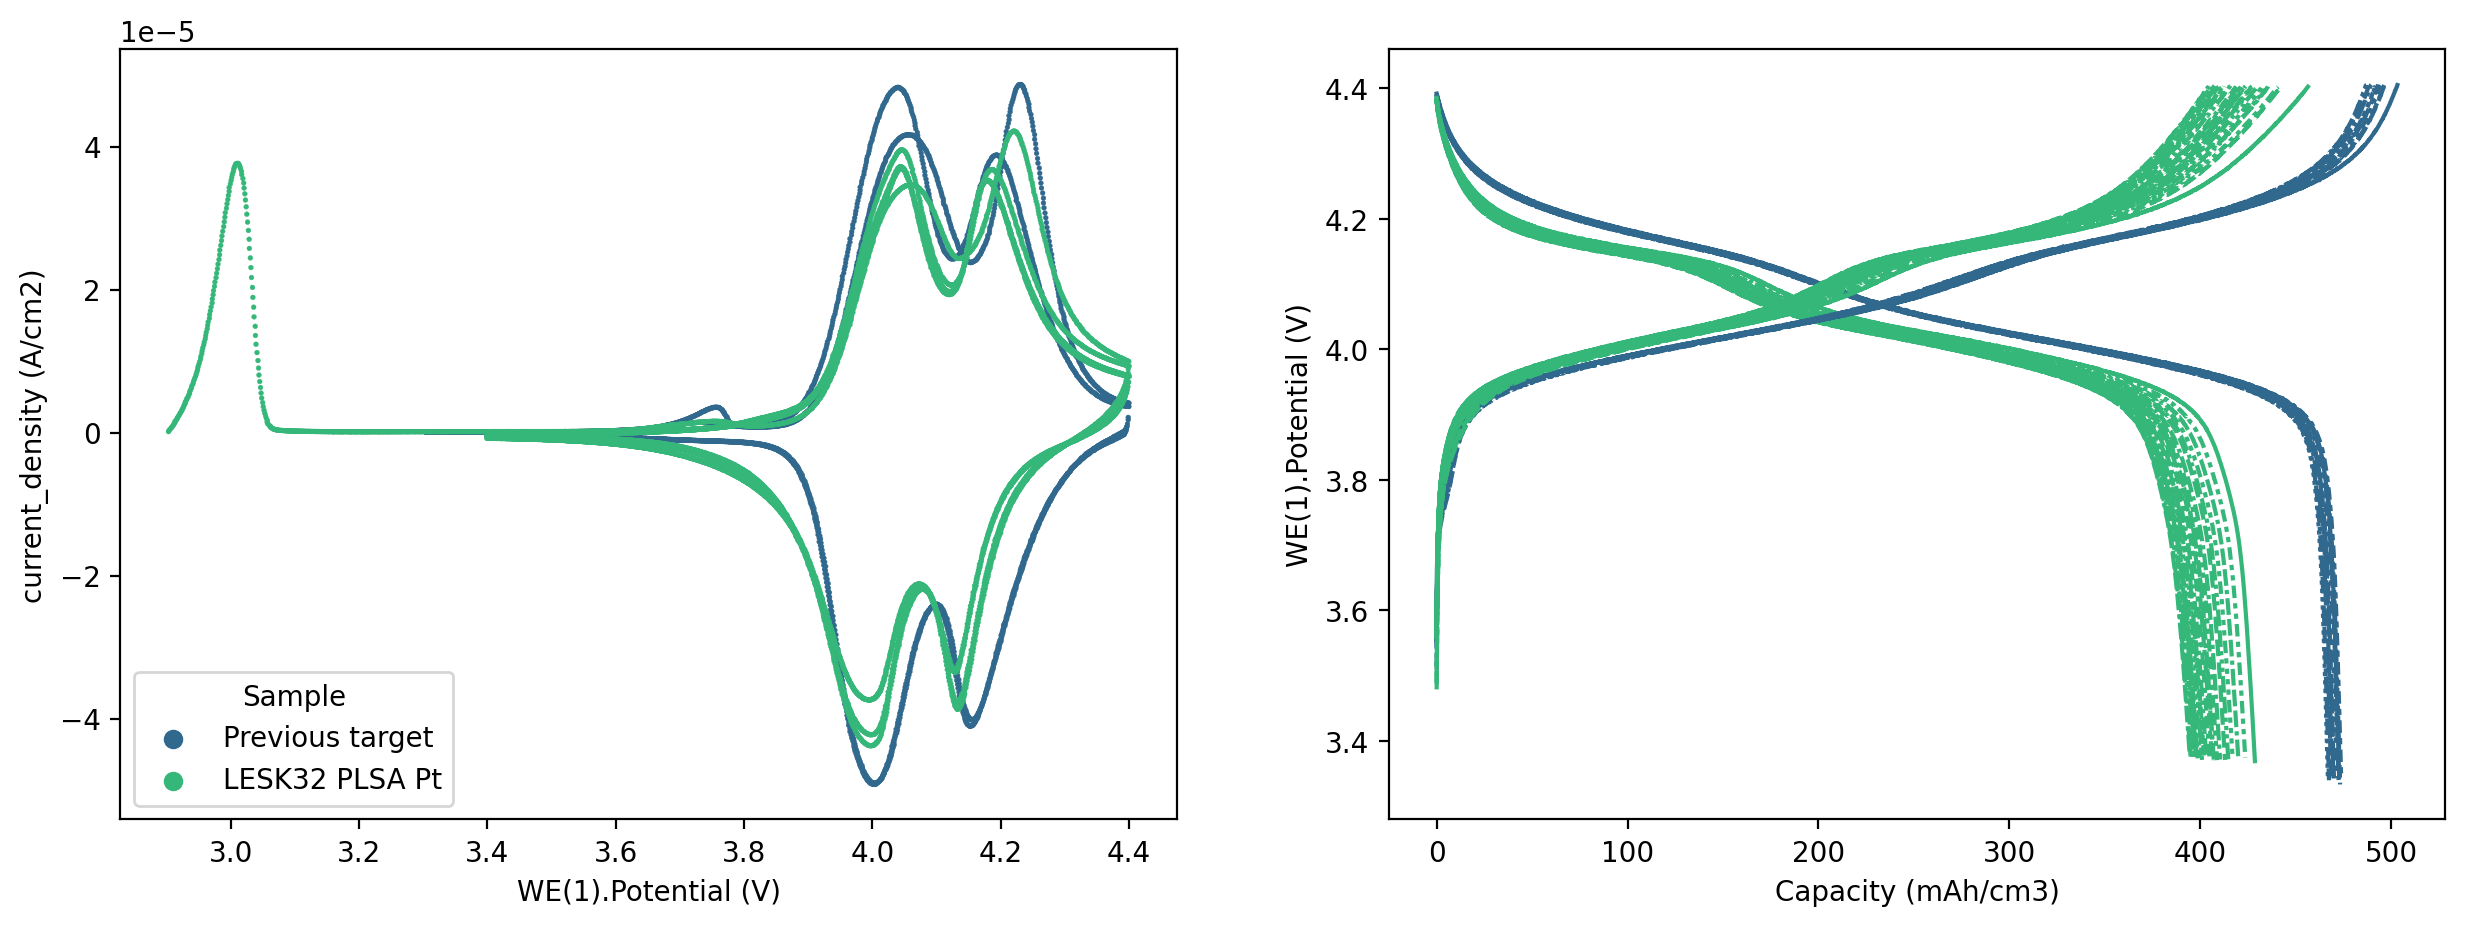

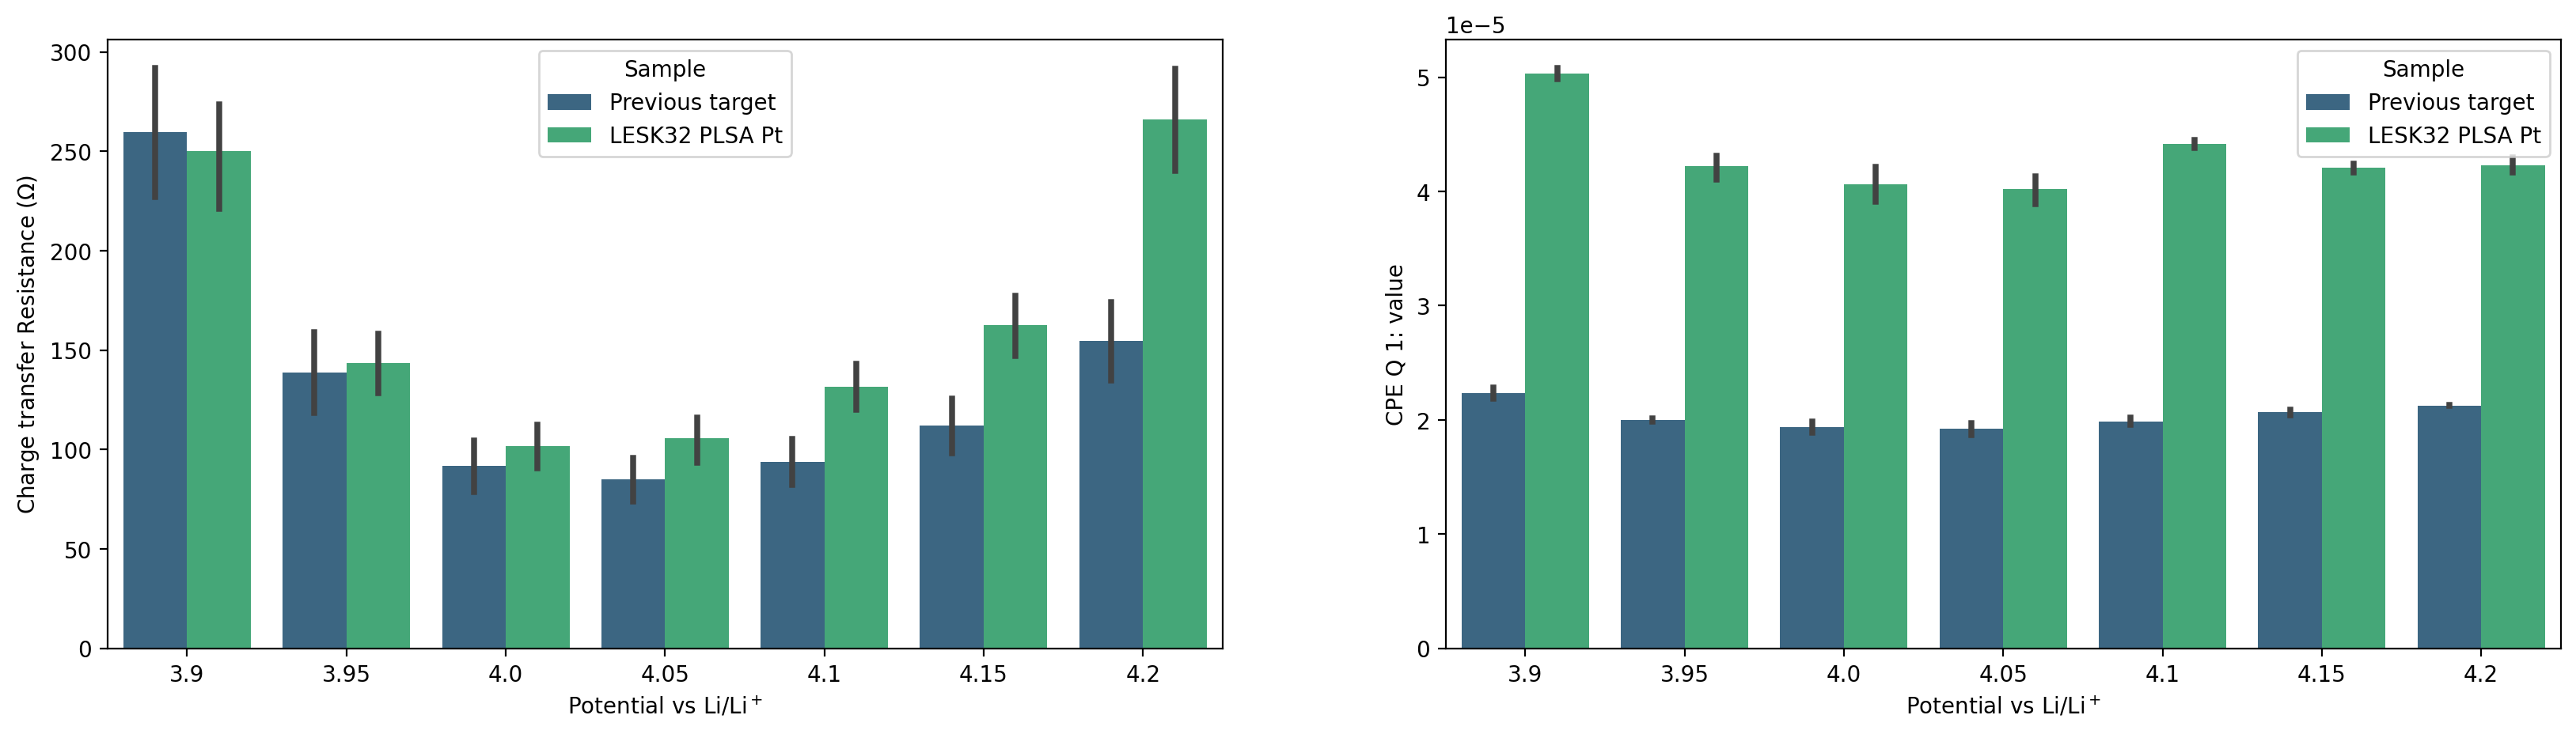

In [10]:
# ============ COMPARE ==================
fig, ax = plt.subplots(1,2, dpi = 200, figsize = (15,5))
palette = 'viridis'
cvs = pd.concat([cv_0, cv_6]) # cv_4, cv_5, , cv_0 cv_2, cv_3, cv_4, cv_0
ls = pd.concat([l_0, l_6]) # l_4, l_5, , l_0,  l_2, l_3, l_4,
ds = pd.concat([d_0, d_6]) # d_4, d_5, , d_0 d_2, d_3, d_4,

sns.scatterplot(data = cvs, x = 'WE(1).Potential (V)', y = 'current_density (A/cm2)', hue = 'Sample', s = 3, edgecolor = None, palette=palette, ax = ax[0])
sns.lineplot(data = ls, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Sample', style = 'Cycle',  legend = False, ax = ax[1], palette = palette)
sns.lineplot(data = ds, x = 'Capacity (mAh/cm3)', y = 'WE(1).Potential (V)', hue = 'Sample', style = 'Cycle', legend = False, ax = ax[1], palette = palette)

############ EIS ################
eis_compare = pd.concat([eis_data0, eis_data_6]) # , eis_data0 eis_data2, eis_data3, eis_data_4, eis_data_ref
palette = 'viridis'
fig, ax = plt.subplots(1,2, dpi = 200, figsize = (20,5))
sns.barplot(data = eis_compare, x = 'Potential vs Li/Li$^+$', y = 'Charge transfer Resistance ($\Omega$)', hue = 'Sample',  palette=palette, ax = ax[0])
sns.barplot(data = eis_compare, x = 'Potential vs Li/Li$^+$', y =  'CPE Q 1: value', hue = 'Sample',  palette=palette, ax = ax[1]) #  'Electrolyte Resistance ($\Omega$)' asdfas

